In [88]:
import torch 
import torch.nn as nn 
import numpy as np 
import pandas as pd 
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import copy 
import matplotlib.pyplot as plt 
import tqdm
import ast 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [89]:
label1 = 'street_traffic'
label2 = 'street_pedestrian'
label3 = 'tram'
run_mode='scene'
Block_number=11

In [90]:
class SceneClassifier(nn.Module):
    def __init__(self):
        super(SceneClassifier, self).__init__()
        self.fc2 = nn.Linear(768, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.fc2(x))
        return x


model = SceneClassifier()
total_params = sum(p.numel() for p in model.parameters())
print(total_params)
model.eval()

199434


SceneClassifier(
  (fc2): Linear(in_features=768, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [91]:
model=torch.load(f'/Users/vayungoel/Desktop/opl/scene_maam_audioset/small_model_scene_{Block_number}_opl.pth',map_location=torch.device('cpu'))
model

SceneClassifier(
  (fc2): Linear(in_features=768, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [92]:
model.eval()

SceneClassifier(
  (fc2): Linear(in_features=768, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [93]:
model.fc2.weight

Parameter containing:
tensor([[-0.0353, -0.0053, -0.0113,  ...,  0.0130, -0.0158, -0.0197],
        [ 0.0621,  0.0037, -0.0170,  ...,  0.0459,  0.0271, -0.0859],
        [-0.0620,  0.0425,  0.0554,  ..., -0.1631, -0.0051,  0.0418],
        ...,
        [-0.0339, -0.0108, -0.1211,  ...,  0.1431,  0.0147, -0.0134],
        [ 0.0564,  0.0168, -0.0327,  ...,  0.0965, -0.0243,  0.0438],
        [-0.0323, -0.0179, -0.0221,  ...,  0.0285,  0.0319, -0.0616]],
       requires_grad=True)

In [94]:
data=pd.read_csv("/Users/vayungoel/Desktop/passt/final_hear21_embeddings_train_all_blocks.csv")

In [95]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [96]:
def train_ready(data,col_name):
    new_list=[]
    for i in range(len(data)):
        temp_list=[]
        x=data[col_name][i]
        tensor_string = x

# Extract the numbers part of the string
        numbers_string = tensor_string.split("[[")[1].split("]]")[0]

# Parse the string into a Python list
        tensor_list = ast.literal_eval("[" + numbers_string + "]")

# Convert the list to a numpy array
        numpy_array = np.array(tensor_list)
        list_data=list(numpy_array)
        
        new_list.append(list_data)
    return new_list

In [97]:
y=data[run_mode].tolist()
print(y)
label_array_train = np.array(y).reshape(-1, 1)
encoder=OneHotEncoder()
y_one_hot_encoded = encoder.fit_transform(label_array_train).toarray()
# print(len(y_one_hot_encoded))
y_one_hot_encoded

['airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport', 'airport'

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [98]:
label1_data = data[data[run_mode] == label1]
label1_data = label1_data.reset_index(drop=True)
col_name=f'embedding{Block_number}'
label1_data_x=train_ready(label1_data,col_name)
label1_data_x=np.array(label1_data_x)
label1_data_x = model(torch.from_numpy(label1_data_x).to(torch.float32))

In [99]:
label1_data_x = label1_data_x.detach().numpy()

In [100]:
label1_data_x

array([[0.        , 0.        , 0.        , ..., 2.181912  , 0.        ,
        2.0773523 ],
       [0.        , 0.        , 0.        , ..., 2.0339563 , 0.        ,
        2.047041  ],
       [0.        , 0.02691006, 0.        , ..., 0.92649144, 0.        ,
        0.86602426],
       ...,
       [0.        , 0.        , 0.        , ..., 1.7297453 , 0.        ,
        1.8254584 ],
       [0.        , 0.        , 0.        , ..., 1.73386   , 0.        ,
        1.876572  ],
       [0.        , 0.        , 0.        , ..., 1.7385172 , 0.        ,
        1.9574463 ]], dtype=float32)

In [101]:
label2_data = data[data[run_mode] == label2]
label2_data = label2_data.reset_index(drop=True)
col_name=f'embedding{Block_number}'
label2_data_x=train_ready(label2_data,col_name)
label2_data_x=np.array(label2_data_x)
label2_data_x = model(torch.from_numpy(label2_data_x).to(torch.float32))

In [102]:
label2_data_x = label2_data_x.detach().numpy()

In [103]:
label2_data_x

array([[0.        , 0.24876818, 0.        , ..., 0.583166  , 0.        ,
        1.476686  ],
       [0.        , 0.5301913 , 0.        , ..., 0.0136299 , 0.        ,
        1.3835351 ],
       [0.        , 0.89996666, 0.        , ..., 0.        , 0.        ,
        0.66148984],
       ...,
       [0.        , 2.3910103 , 0.        , ..., 0.        , 0.32179305,
        0.09651427],
       [0.        , 0.5137892 , 0.55635726, ..., 0.13525611, 0.        ,
        0.03076783],
       [0.        , 1.6693643 , 0.        , ..., 0.20799828, 0.46975848,
        0.7319052 ]], dtype=float32)

In [104]:
label3_data = data[data[run_mode] == label3]
label3_data = label3_data.reset_index(drop=True)
col_name=f'embedding{Block_number}'
label3_data_x=train_ready(label3_data,col_name)
label3_data_x=np.array(label3_data_x)
label3_data_x = model(torch.from_numpy(label3_data_x).to(torch.float32))

In [105]:
label3_data_x = label3_data_x.detach().numpy()

In [106]:
label3_data_x

array([[0.        , 0.        , 3.5056612 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.5040078 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.21673416, 2.0823832 , ..., 0.        , 0.26310337,
        0.        ],
       ...,
       [0.        , 0.        , 1.942808  , ..., 0.02277128, 0.        ,
        0.2261783 ],
       [0.        , 0.        , 1.5265783 , ..., 0.39602122, 0.        ,
        0.19118555],
       [0.        , 0.        , 0.76851165, ..., 0.97595006, 0.        ,
        0.67690736]], dtype=float32)

In [107]:
combined_data = np.vstack((label1_data_x, label2_data_x, label3_data_x))

In [108]:
pca = PCA(n_components=2)
combined_data_pca = pca.fit_transform(combined_data)

In [109]:
combined_data_pca.shape

(4178, 2)

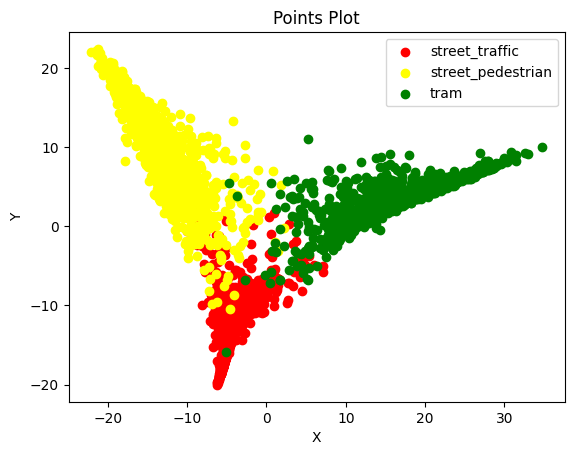

In [110]:
label1_final = combined_data_pca[0:len(label1_data_x)]
label2_final = combined_data_pca[len(label1_data_x):len(label1_data_x)+len(label2_data_x)]
label3_final = combined_data_pca[len(label1_data_x)+len(label2_data_x):]

# Plot the points with different colors
plt.scatter(label1_final[:, 0], label1_final[:, 1], color='red', label=label1)
plt.scatter(label2_final[:, 0], label2_final[:, 1], color='yellow', label=label2)
plt.scatter(label3_final[:, 0], label3_final[:, 1], color='green', label=label3)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points Plot')
plt.legend()
plt.show()